In [6]:
!pip install selenium


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import requests
from bs4 import BeautifulSoup

In [216]:
url = 'https://search.shopping.naver.com/search/all?frm=NVSHCHK&origQuery=%EB%8F%84%EC%8B%9C%EB%9D%BD&pagingIndex=1&pagingSize=40&productSet=checkout&query=%EB%8F%84%EC%8B%9C%EB%9D%BD&sort=review&timestamp=&viewType=list#'
req = requests.get(url)
soup = BeautifulSoup(req.text, 'html.parser')

In [2]:
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

In [217]:
driver = webdriver.Chrome()
driver.get(url)

In [19]:
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(2)

In [20]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [35]:
food_items = soup.select('.basicList_inner__xCM3J')
print(len(food_items))

40


In [85]:
food_item = food_items[0]
food_item

<div class="basicList_inner__xCM3J"><div class="basicList_img_area__AdRY_"><div class="thumbnail_thumb_wrap__RbcYO _wrapper"><a class="thumbnail_thumb__Bxb6Z" data-nclick="N=a:lst*N.image,r:1,i:81506404972" data-testid="SEARCH_PRODUCT" href="https://cr.shopping.naver.com/adcr.nhn?x=gKl%2BpBbqDbauCiTSkYvygP%2F%2F%2Fw%3D%3Ds5OwWOi2L8TQ8UEYu2jus2%2F%2Bzqz9awB4Msmm6KQlxdK2eERs7QaGSSeK7VV2uQBh%2Fpk3FnoVsWO3JB4X8pk%2BSnvCj1%2FtDFbsyyM%2B9l4HKWgF56CpPwk1FtMp3zUGMMN6qxEkYxM5EWYYS4bfmUFbxEES%2BortKzfQDWBF5GV%2FKfqEhJv3ljJo79VVIpj6%2Fm3WOZitEXH3Lhq9WJBb8Kra82nnc67O7s5N5SAWZEQiMn0vL%2Fowdnq7%2Fmfq67OVRzok0S5SJNLgIdS1XFCtZ5GETGG%2F95wUHiMdGUqaU%2Fv9Ma%2FCn8072uar0LM6FhsIOW4IRMpapMib3aooXGDs4FQ%2B%2FbWmQOcvngtWgGno7fshDU4ttua%2FnQn1QJVeRZVt7AJt%2FlyeGhtbBfjmfPDbcLIGEj1zn7vtP55QYFqqp7wcbwxptzqVVVuYRm%2FeMomY6GaUhXu7fqQgy6HOFCSIkCeFlQ5271cWE6J25GnwBhTmp%2FtSFbK5l6oRvRA%2B6bTSSbAMA7lDKv84MvK0dQfrthDFISrlHDKUkLAtnHQbACvAqmdQf6k6KCtBIVMsYcmt6WptWsQocLEGGa0wsleHc2pFkrWTVJch2rQsi2kZZschWgQ130m6lhV8l31NOh2

In [90]:
link = food_item.select('.basicList_title__VfX3c > a')[0].attrs['href']
link

'https://cr.shopping.naver.com/adcr.nhn?x=gKl%2BpBbqDbauCiTSkYvygP%2F%2F%2Fw%3D%3Ds5OwWOi2L8TQ8UEYu2jus2%2F%2Bzqz9awB4Msmm6KQlxdK2eERs7QaGSSeK7VV2uQBh%2Fpk3FnoVsWO3JB4X8pk%2BSnvCj1%2FtDFbsyyM%2B9l4HKWgF56CpPwk1FtMp3zUGMMN6qxEkYxM5EWYYS4bfmUFbxEES%2BortKzfQDWBF5GV%2FKfqEhJv3ljJo79VVIpj6%2Fm3WOZitEXH3Lhq9WJBb8Kra82nnc67O7s5N5SAWZEQiMn0vL%2Fowdnq7%2Fmfq67OVRzok0S5SJNLgIdS1XFCtZ5GETGG%2F95wUHiMdGUqaU%2Fv9Ma%2FCn8072uar0LM6FhsIOW4IRMpapMib3aooXGDs4FQ%2B%2FbWmQOcvngtWgGno7fshDU4ttua%2FnQn1QJVeRZVt7AJt%2FlyeGhtbBfjmfPDbcLIGEj1zn7vtP55QYFqqp7wcbwxptzqVVVuYRm%2FeMomY6GaUhXu7fqQgy6HOFCSIkCeFlQ5271cWE6J25GnwBhTmp%2FtSFbK5l6oRvRA%2B6bTSSbAMA7lDKv84MvK0dQfrthDFISrlHDKUkLAtnHQbACvAqmdQf6k6KCtBIVMsYcmt6WptWsQocLEGGa0wsleHc2pFkrWTVJch2rQsi2kZZschWgQ130m6lhV8l31NOh20%2FXrQrmPzQJ9FWjfLM6ecfXXZBug4SwcLvxUEucVmH%2BcOht40%3D&nvMid=81506404972&catId=50006199'

In [91]:
# 제품 이동
driver.get(link)

In [121]:
# 리뷰
driver.find_element(By.XPATH, '//*[@id="content"]/div/div[3]/div[3]/ul/li[2]/a').click()
time.sleep(1)

In [122]:
# 리뷰 최신순
driver.find_element(By.XPATH, '//*[@id="REVIEW"]/div/div[3]/div[1]/div[1]/ul/li[2]/a').click()
time.sleep(1)

<html lang="ko"><head>
<meta charset="utf-8"/>
<meta content="no-cache, no-store, must-revalidate" http-equiv="Cache-Control"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="로칼 다이어트 식단 48종 골라담기 닭가슴살 냉동 도시락 아침 점심 관리" name="description"/>
<meta content="로칼 다이어트 식단 48종 골라담기 닭가슴살 냉동 도시락 아침 점심 관리 : 미스터네이처 다이어트" property="og:title"/>
<meta content="https://shop-phinf.pstatic.net/20230503_213/1683091449760C58f5_JPEG/9731541266627855_510689470.jpg?type=o1000" property="og:image"/>
<meta content="로칼 다이어트 식단 48종 골라담기 닭가슴살 냉동 도시락 아침 점심 관리" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="로칼 다이어트 식단 48종 골라담기 닭가슴살 냉동 도시락 아침 점심 관리 : 미스터네이처 다이어트" name="twitter:title"/>
<meta content="https://shop-phinf.pstatic.net/20230503_213/1683091449760C58f5_JPEG/9731541266627855_510689470.jpg?type=o1000" name="twitter:image"/>
<meta content="로칼 다이어트 식단 48종 골라담기 닭가슴살 냉동 도시락 아침 점심 관리
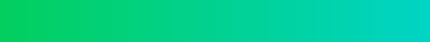
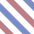
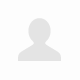
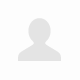

In [94]:
sup_html = driver.page_source
sup_soup = BeautifulSoup(sup_html, 'html.parser')
sup_soup

In [129]:
review_list = sup_soup.select('.TsOLil1PRz')[0]
review_list

<ul class="TsOLil1PRz"><li class="_2389dRohZq"><div class="_1-CNpGwOcC"><div class="_30o7PGmsIy"><div class="_1yIGHygFbx"><div class="_1XNnRviOK8"><div class="_3kszHSdr4m"><div class="_1YShY6EQ56"><div class="_1rZLm75kLm"><div class="BhXxGSggNI"><img alt="프로필_image" class="_2A8ItnjwLq" data-src="https://profile-phinf.pstatic.net/404/default.png?type=f80_80" src="https://profile-phinf.pstatic.net/404/default.png?type=f80_80"/></div><div class="_37TlmH3OaI"><div class="_2V6vMO_iLm"><span class="_9iVSaZa02j"><span class="_3hrdz1EXfJ" style="width: 60%;"><span class="blind">평점</span></span></span><em class="_15NU42F3kT">3</em></div><div class="_2FmJXrTVEX"><strong class="_3QDEeS6NLn">eam0****</strong><span class="_3QDEeS6NLn">23.05.05.</span><div class="_1JZCQjfNPR"><a class="_1At-_FVDqr @N=a:rvs.report" href="#" role="button" title="새 창">신고</a></div></div><div class="_14FigHP3K8">상품구성: 36_취나물밥&amp;간장숯불고기<dl class="_3QC2SDSKkZ"><div class="_2lh7oBgBrF"><dt class="_1yrmOZ-K3F">맛 만족도</dt><dd

In [131]:
review = review_list.select('li')[0]
review

<li class="_2389dRohZq"><div class="_1-CNpGwOcC"><div class="_30o7PGmsIy"><div class="_1yIGHygFbx"><div class="_1XNnRviOK8"><div class="_3kszHSdr4m"><div class="_1YShY6EQ56"><div class="_1rZLm75kLm"><div class="BhXxGSggNI"><img alt="프로필_image" class="_2A8ItnjwLq" data-src="https://profile-phinf.pstatic.net/404/default.png?type=f80_80" src="https://profile-phinf.pstatic.net/404/default.png?type=f80_80"/></div><div class="_37TlmH3OaI"><div class="_2V6vMO_iLm"><span class="_9iVSaZa02j"><span class="_3hrdz1EXfJ" style="width: 60%;"><span class="blind">평점</span></span></span><em class="_15NU42F3kT">3</em></div><div class="_2FmJXrTVEX"><strong class="_3QDEeS6NLn">eam0****</strong><span class="_3QDEeS6NLn">23.05.05.</span><div class="_1JZCQjfNPR"><a class="_1At-_FVDqr @N=a:rvs.report" href="#" role="button" title="새 창">신고</a></div></div><div class="_14FigHP3K8">상품구성: 36_취나물밥&amp;간장숯불고기<dl class="_3QC2SDSKkZ"><div class="_2lh7oBgBrF"><dt class="_1yrmOZ-K3F">맛 만족도</dt><dd class="_1BgHSj04oF">맛 

In [115]:
# 별점
score = int(review.select('._15NU42F3kT')[0].get_text())
score

3

In [120]:
# 리뷰 글
text = review.select('._3QDEeS6NLn')[2].get_text()
text

'맛이없어서 재구맨 안할듯'

In [155]:
# 리뷰 글 한 페이지
sup_html = driver.page_source
sup_soup = BeautifulSoup(sup_html, 'html.parser')
sup_soup

ls = []
cnt = 0

for reviews in review_list:
    review_list = sup_soup.select('.TsOLil1PRz')[0]
    review = review_list.select('li')[cnt]
    score = int(review.select('._15NU42F3kT')[0].get_text())
    text = review.select('._3QDEeS6NLn')[2].get_text()
    ls.append([score, text])
    cnt = cnt + 1
ls

[[3, '맛이없어서 재구맨 안할듯'],
 [5, '가성비 좋아요 잘 먹고 있습니다'],
 [5, '가성비 좋아요 잘 먹고 있습니다'],
 [5, '생각보다 맛있어요!!'],
 [5, '생각보다 맛있어요!!'],
 [5, '생각보다 맛있어요!!'],
 [5, '생각보다 맛있어요!!'],
 [5, '생각보다 맛있어요!!'],
 [5, '생각보다 맛있어요!!'],
 [5, '생각보다 맛있어요!!'],
 [5, '간단하게 한끼 식사로 좋아요'],
 [5, '먹기 편하고 좋아용'],
 [5, '퇴근 후에 간단한 끼니로 너무 좋아요'],
 [5, '점점 더 맛있어지고있어요 ㅋㅋ'],
 [5, '계란볶음밥 맛있어용!'],
 [5, '점점 더 맛있어지고있어요 ㅋㅋ'],
 [5, '간단하게 끼니 먹기 좋아요~!'],
 [5, '간단하게 먹기 너무 좋아용'],
 [5,
  '맛있어요 ㅠㅠ 근데 양이 적은게 다이어트 도시락이라 그렇겠죠 ㅠㅠ 너무 만족 합니다. 열개 구매하서 이제 1일차 도시락 개봉!!'],
 [5, '양은 적지만 맛있고 간단히 먹기 좋아용!']]

In [166]:
# 1 ~ 5 페이지 리뷰 글
ls = []

for i in range(2,7):
    print(f'{i-1}페이지 시작')
    driver.find_element(By.XPATH, f'//*[@id="REVIEW"]/div/div[3]/div[2]/div/div/a[{i}]').click()
    time.sleep(2)
    
    sup_html = driver.page_source
    sup_soup = BeautifulSoup(sup_html, 'html.parser')
    sup_soup

    cnt = 0

    for reviews in review_list:
        review_list = sup_soup.select('.TsOLil1PRz')[0]
        review = review_list.select('li')[cnt]
        score = int(review.select('._15NU42F3kT')[0].get_text())
        text = review.select('._3QDEeS6NLn')[2].get_text()
        ls.append([score, text])
        cnt = cnt + 1
    print(f'{i-1}페이지 끝')
ls

1페이지 시작
1페이지 끝
2페이지 시작
2페이지 끝
3페이지 시작
3페이지 끝
4페이지 시작
4페이지 끝
5페이지 시작
5페이지 끝


[[5, '맛있게 잘먹었습니다아'],
 [5, '두번째 구매합니다 냠냠'],
 [5, '두번째 재구매입니다 맛잇어요'],
 [3, '맛이없어서 재구맨 안할듯'],
 [5, '가성비 좋아요 잘 먹고 있습니다'],
 [5, '가성비 좋아요 잘 먹고 있습니다'],
 [5, '생각보다 맛있어요!!'],
 [5, '생각보다 맛있어요!!'],
 [5, '생각보다 맛있어요!!'],
 [5, '생각보다 맛있어요!!'],
 [5, '생각보다 맛있어요!!'],
 [5, '생각보다 맛있어요!!'],
 [5, '생각보다 맛있어요!!'],
 [5, '간단하게 한끼 식사로 좋아요'],
 [5, '먹기 편하고 좋아용'],
 [5, '퇴근 후에 간단한 끼니로 너무 좋아요'],
 [5, '점점 더 맛있어지고있어요 ㅋㅋ'],
 [5, '계란볶음밥 맛있어용!'],
 [5, '점점 더 맛있어지고있어요 ㅋㅋ'],
 [5, '간단하게 끼니 먹기 좋아요~!'],
 [5, '간단하게 먹기 너무 좋아용'],
 [5,
  '맛있어요 ㅠㅠ 근데 양이 적은게 다이어트 도시락이라 그렇겠죠 ㅠㅠ 너무 만족 합니다. 열개 구매하서 이제 1일차 도시락 개봉!!'],
 [5, '양은 적지만 맛있고 간단히 먹기 좋아용!'],
 [5, '퇴근 후에 간단하게 저녁으로 먹기 좋아용'],
 [5, '포장도 꼼꼼하고 간편하게 먹기 좋아요!'],
 [5, '가성비 좋습니다. 잘먹고 있어요'],
 [5, '가성비 좋습니다. 잘먹고 있어요'],
 [5, '가성비 좋습니다. 잘먹고 있어요'],
 [5, '먹기 간편하고 맛있어요!'],
 [5, '너무 많이 구입해서\n리뷰쓰기가 힘들어요\n가족들이 맛있다고 합니다'],
 [5, '너무 많이 구입해서\n리뷰쓰기가 힘들어요\n가족들이 맛있다고 합니다'],
 [5, '리뷰를 도시락 한개마다 써야하니'],
 [5, '너무 많이 구입해서\n리뷰쓰기가 힘들어요\n가족들이 맛있다고 합니다'],
 [5, '너무 많이 구입해서\n리뷰쓰기가 힘들어요\n가족들이 맛있다고 합니다'],
 [5, '너무 많이 구

In [167]:
len(ls)

100

In [3]:
# !pip install pandas
import pandas as pd

In [171]:
# 데이터 프레임 생성
df = pd.DataFrame(ls, columns=['평점', '리뷰'])
df

,평점,리뷰
0,5,맛있게 잘먹었습니다아
1,5,두번째 구매합니다 냠냠
2,5,두번째 재구매입니다 맛잇어요
3,3,맛이없어서 재구맨 안할듯
4,5,가성비 좋아요 잘 먹고 있습니다
...,...,...
95,5,배송도 새벽배송 된다고 따로 문자 주셔서 새벽배송으로 받았어요. 친절하셔용ㅎㅎ\n일...
96,5,배송도 새벽배송 된다고 따로 문자 주셔서 새벽배송으로 받았어요. 친절하셔용ㅎㅎ\n일...
97,5,배송도 새벽배송 된다고 따로 문자 주셔서 새벽배송으로 받았어요. 친절하셔용ㅎㅎ\n일...
98,5,배송도 새벽배송 된다고 따로 문자 주셔서 새벽배송으로 받았어요. 친절하셔용ㅎㅎ\n일...


In [ ]:
# 파일 저장
# df.to_csv("./csv/danawa_crawling.csv", index=False)

# 구매 건수가 있으면서 네이버 톡톡 있는 페이지만 이동

In [238]:
driver = webdriver.Chrome()
driver.get(url)
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(2)
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [176]:
food_items = soup.select('.basicList_inner__xCM3J')
food_items[0]

<div class="basicList_inner__xCM3J"><div class="basicList_img_area__AdRY_"><div class="thumbnail_thumb_wrap__RbcYO _wrapper"><a class="thumbnail_thumb__Bxb6Z" data-nclick="N=a:lst*N.image,r:1,i:81506404972" data-testid="SEARCH_PRODUCT" href="https://cr.shopping.naver.com/adcr.nhn?x=c5%2FYTxYykcbw1J4TfHdeOv%2F%2F%2Fw%3D%3DsIxD78Q6gfD1odOFfznTC%2FYjBes6b4L%2FoKOQ2oEtI4dgQpd6z0GmZKw5N2gLjIek2rSMs2yY0%2BzTM3ZFt2T8SI4A04Kvqeb%2BqBTIw5XVYuO5EsB%2BRI08X2Kp1vj65S3cBiTGdbHvqTnQ8SDSfceXwKUuG%2FicFY3q9hGdjro9%2BnxTWlthmIe9RtHIiOuCPe0FEYpiqnNabHNYpvBnCIQFI5ckJ6KFIF2qgLVo9n32aIGek6v2w9jBqMGR4TTsgYaQnlII%2ByYYqWVu3SSXxcjEJdOc452y5VYh2M1vd0%2BONAhq8mA7n09hER1XTkfgcq9YPzq1V4xPRk%2FVPEqucIFXywaLZ6Q6sNOtCS6Xx4unsu5VK8CStOOFp2%2FtYSdT0MlcbKVHcH0IPImWOgY1VoDzrp1UKv%2BFLrWPdc8iqFfE5ssAzmz5AKde3j0%2Fcj17gvEyW65kURrR3QC1cBijjyTs%2FFZvzcz7v403h1vNptDnf6kmO0LJr1i38K1b0e1SkfDnVjDqQt7v7qNpbQDxTg3E%2Fudo7bQ1627cKdiEtV5EAn5StQf9qWmf8b7DB6wscogy1is%2BdPhZ4x%2B%2BCPFdlXV2tnJYuFzFHeYVdkBXDgd91YSVH%2B806BUh6N2IDnyMn6c

In [203]:
food_item = food_items[0]
food_item

<div class="basicList_inner__xCM3J"><div class="basicList_img_area__AdRY_"><div class="thumbnail_thumb_wrap__RbcYO _wrapper"><a class="thumbnail_thumb__Bxb6Z" data-nclick="N=a:lst*N.image,r:1,i:81506404972" data-testid="SEARCH_PRODUCT" href="https://cr.shopping.naver.com/adcr.nhn?x=c5%2FYTxYykcbw1J4TfHdeOv%2F%2F%2Fw%3D%3DsIxD78Q6gfD1odOFfznTC%2FYjBes6b4L%2FoKOQ2oEtI4dgQpd6z0GmZKw5N2gLjIek2rSMs2yY0%2BzTM3ZFt2T8SI4A04Kvqeb%2BqBTIw5XVYuO5EsB%2BRI08X2Kp1vj65S3cBiTGdbHvqTnQ8SDSfceXwKUuG%2FicFY3q9hGdjro9%2BnxTWlthmIe9RtHIiOuCPe0FEYpiqnNabHNYpvBnCIQFI5ckJ6KFIF2qgLVo9n32aIGek6v2w9jBqMGR4TTsgYaQnlII%2ByYYqWVu3SSXxcjEJdOc452y5VYh2M1vd0%2BONAhq8mA7n09hER1XTkfgcq9YPzq1V4xPRk%2FVPEqucIFXywaLZ6Q6sNOtCS6Xx4unsu5VK8CStOOFp2%2FtYSdT0MlcbKVHcH0IPImWOgY1VoDzrp1UKv%2BFLrWPdc8iqFfE5ssAzmz5AKde3j0%2Fcj17gvEyW65kURrR3QC1cBijjyTs%2FFZvzcz7v403h1vNptDnf6kmO0LJr1i38K1b0e1SkfDnVjDqQt7v7qNpbQDxTg3E%2Fudo7bQ1627cKdiEtV5EAn5StQf9qWmf8b7DB6wscogy1is%2BdPhZ4x%2B%2BCPFdlXV2tnJYuFzFHeYVdkBXDgd91YSVH%2B806BUh6N2IDnyMn6c

In [239]:
cnt = 0
for i in food_items:
    food_item = food_items[cnt]
    cnt = cnt + 1
    a = food_item.select('.basicList_etc_box__5lkgg')[0].get_text()
    if "구매건수" in a:
        if "톡톡" in a:
            print(f'********{cnt}*********')
            print('톡톡')
            print(a)
            link = food_item.select('.basicList_title__VfX3c > a')[0].attrs['href']
            print(link)
            print(f'********{cnt}*********')
            driver.get(link)
            time.sleep(2)
    else:
        print('없음')
    # talktalk_link_talk__rqu4I

********1*********
톡톡
리뷰281,421구매건수152,336등록일 2018.12.찜하기6456신고하기톡톡
https://cr.shopping.naver.com/adcr.nhn?x=c5%2FYTxYykcbw1J4TfHdeOv%2F%2F%2Fw%3D%3DsIxD78Q6gfD1odOFfznTC%2FYjBes6b4L%2FoKOQ2oEtI4dgQpd6z0GmZKw5N2gLjIek2rSMs2yY0%2BzTM3ZFt2T8SI4A04Kvqeb%2BqBTIw5XVYuO5EsB%2BRI08X2Kp1vj65S3cBiTGdbHvqTnQ8SDSfceXwKUuG%2FicFY3q9hGdjro9%2BnxTWlthmIe9RtHIiOuCPe0FEYpiqnNabHNYpvBnCIQFI5ckJ6KFIF2qgLVo9n32aIGek6v2w9jBqMGR4TTsgYaQnlII%2ByYYqWVu3SSXxcjEJdOc452y5VYh2M1vd0%2BONAhq8mA7n09hER1XTkfgcq9YPzq1V4xPRk%2FVPEqucIFXywaLZ6Q6sNOtCS6Xx4unsu5VK8CStOOFp2%2FtYSdT0MlcbKVHcH0IPImWOgY1VoDzrp1UKv%2BFLrWPdc8iqFfE5ssAzmz5AKde3j0%2Fcj17gvEyW65kURrR3QC1cBijjyTs%2FFZvzcz7v403h1vNptDnf6kmO0LJr1i38K1b0e1SkfDnVjDqQt7v7qNpbQDxTg3E%2Fudo7bQ1627cKdiEtV5EAn5StQf9qWmf8b7DB6wscogy1is%2BdPhZ4x%2B%2BCPFdlXV2tnJYuFzFHeYVdkBXDgd91YSVH%2B806BUh6N2IDnyMn6cuwV3OdHgSE8LoEjTx9zpNPbFaRsOtQUnaEEbxBoHxZXOc%3D&nvMid=81506404972&catId=50006199
********1*********
없음
********3*********
톡톡
리뷰57,680구매건수29,423등록일 2019.07.찜하기1382신고하기톡톡
http

없음
없음
없음
없음
********22*********
톡톡
리뷰14,610구매건수3,677등록일 2019.11.찜하기349신고하기톡톡
https://cr.shopping.naver.com/adcr.nhn?x=PzpxgtIBMRE%2B4CPzfk5vnP%2F%2F%2Fw%3D%3DsCx8VlPePfoG7iQ%2FNVissPR08We8V6A%2F%2FJamdlPTN5rGeERs7QaGSSeK7VV2uQBh%2F8%2BQHADr6d%2Ba6DpzpswEwOkFdk4VAH3ptKUFb0a5zNDvvrEq7sV39RE%2BLdGDBF8WpUa54A5BsgbC26KEq1XW6%2B0S%2BortKzfQDWBF5GV%2FKfqEhJv3ljJo79VVIpj6%2Fm3WO%2Bo6fABSSzuF0xxTslZMdPnnc67O7s5N5SAWZEQiMn0vL%2Fowdnq7%2Fmfq67OVRzok0S5SJNLgIdS1XFCtZ5GETGEvCB11ODwZQWURkzHmJdIi%2FchUmqDOlapQ3baqTMjzYlR9%2BsFapW2lINDnoWOEt6wqEzclVysKi9J%2BZ1qUaCRd7O2N6Ds1EShPDKkRd%2Fo6RN1MR2EUNlyosk84D%2BVxJ%2Bcj64B11jQQaRcrN1eAR5dPANTi3QHgetnB3i5OdgwDqymQDS3GbCCrpBfBQLFuT273ra08Z2n14un07b2Cur%2FXo2vGcAgC0IjCYn%2FvKk%2BNB7p%2B99Iv0WaUn4kTMaugzlHKZc7oYziXdHIgevrlsOmh1Dai6jeMuPTDnzBeoUnQShnQHZMaDZ8oEqWFx8%2B9gEnhNm1v%2BZw6quixw%2B0s%2BFhuEU8qqs1ssyeDxucEw7jjSb1NmOoRBMBsXNQGXzjfbC%2BFUQB%2FrDAzm2q1KHRsHkfE%3D&nvMid=82272651287&catId=50006199
********22*********
********23*********
톡톡
리뷰13,676구매건수4,742등

없음
없음


# 1페이지 제품(40개) 리뷰(1~5페이지) 긁기

In [4]:
url = 'https://search.shopping.naver.com/search/all?frm=NVSHCHK&origQuery=%EB%8F%84%EC%8B%9C%EB%9D%BD&pagingIndex=1&pagingSize=40&productSet=checkout&query=%EB%8F%84%EC%8B%9C%EB%9D%BD&sort=review&timestamp=&viewType=list#'
req = requests.get(url)
soup = BeautifulSoup(req.text, 'html.parser')

In [246]:
driver = webdriver.Chrome()
driver.get(url)

driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(2)

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

food_items = soup.select('.basicList_inner__xCM3J')

ls = []
cnt = 0
for i in food_items:
    food_item = food_items[cnt]
    cnt = cnt + 1
    chk = food_item.select('.basicList_etc_box__5lkgg')[0].get_text()
    if "구매건수" in chk:
        if "톡톡" in chk:
            print(f'********{cnt}*********')
            print('톡톡')
            print(chk)
            link = food_item.select('.basicList_title__VfX3c > a')[0].attrs['href']
            print(link)
            print(f'********{cnt}*********')
            driver.get(link)
            time.sleep(2)

            for i in range(2,7):
                print(f'{i-1}페이지 시작')
                driver.find_element(By.XPATH, f'//*[@id="REVIEW"]/div/div[3]/div[2]/div/div/a[{i}]').click()
                time.sleep(2)

                sup_html = driver.page_source
                sup_soup = BeautifulSoup(sup_html, 'html.parser')
                sup_soup

                num = 0

                for reviews in review_list:
                    review_list = sup_soup.select('.TsOLil1PRz')[0]
                    review = review_list.select('li')[num]
                    score = int(review.select('._15NU42F3kT')[0].get_text())
                    text = review.select('._3QDEeS6NLn')[2].get_text()
                    ls.append([score, text])
                    num = num + 1
                print(f'{i-1}페이지 끝')
    else:
        print('없음')
ls

********1*********
톡톡
리뷰281,421구매건수152,336등록일 2018.12.찜하기6461신고하기톡톡
https://cr.shopping.naver.com/adcr.nhn?x=jZ2bh1VMeeXS%2Bpr9rF486v%2F%2F%2Fw%3D%3DsVDQY5oyTQ2Tv4JUOmuFUqf%2Bzqz9awB4Msmm6KQlxdK2eERs7QaGSSeK7VV2uQBh%2FXvOFQQndho3FygFKtvHP1mcfi0F%2BHyHTNZrbqf%2BEgqSyIe9aHHldVWxMzBAW574DcaWPDDpSlz64VQUXNUvMW0S%2BortKzfQDWBF5GV%2FKfqEhJv3ljJo79VVIpj6%2Fm3WOZitEXH3Lhq9WJBb8Kra82nnc67O7s5N5SAWZEQiMn0vL%2Fowdnq7%2Fmfq67OVRzok0S5SJNLgIdS1XFCtZ5GETGIrimkWZL3WcW3W8YiZcnzXwRhKe1y%2B7Em5Ar3HORDOLMpapMib3aooXGDs4FQ%2B%2FbWmQOcvngtWgGno7fshDU4ttua%2FnQn1QJVeRZVt7AJt%2FlyeGhtbBfjmfPDbcLIGEj1zn7vtP55QYFqqp7wcbwxptzqVVVuYRm%2FeMomY6GaUhXu7fqQgy6HOFCSIkCeFlQ5271cWE6J25GnwBhTmp%2FtSFbK5l6oRvRA%2B6bTSSbAMA7lDKv84MvK0dQfrthDFISrlHDKUkLAtnHQbACvAqmdQf6k6KCtBIVMsYcmt6WptWsQocLEGGa0wsleHc2pFkrWTVJch2rQsi2kZZschWgQ130m6lhV8l31NOh20%2FXrQrmPzQJ9FWjfLM6ecfXXZBug4SwcLvxUEucVmH%2BcOht40%3D&nvMid=81506404972&catId=50006199
********1*********
1페이지 시작
1페이지 끝
2페이지 시작
2페이지 끝
3페이지 시작
3페이지 끝
4페이지 시작
4페이지 끝
5페이지 시작
5페이지 

1페이지 시작
1페이지 끝
2페이지 시작
2페이지 끝
3페이지 시작
3페이지 끝
4페이지 시작
4페이지 끝
5페이지 시작
5페이지 끝
없음
없음
없음
없음
********22*********
톡톡
리뷰14,610구매건수3,677등록일 2019.11.찜하기349신고하기톡톡
https://cr.shopping.naver.com/adcr.nhn?x=vfkKTaPIxOUn2mb2f8IJsf%2F%2F%2Fw%3D%3Ds%2FyrzR0YMD7VKEwFGGJgHvGm9OO8Afp%2FFvH1tMygwEG2SQIY%2FeVR6senWALe0JQ%2FRSVcuUuvt%2Ba57L%2BWkhy3py17enoSQpiXPWWZpQHf%2BF4O%2FXp7lQ%2BHrGTJa1REMV7Mdrrgj51N%2BQIUGDZoDPuLR8sVIhUTYq2J1wF4XcKD2AOWkOA3ZateG%2FY8eKxwX1E0NsaIdQl5NmlKx0hhyedc%2F4N913UBrVn2%2Bec%2FJ0O9m8XhVXemfpmeX70wC2wQT5nyi5pxiwDZPU40LYzhHX%2FcRv6Cc3YPYaqb5Vemwm58DODhLUjzL6ZKh%2Fl3BLB3vC3QtHhTl0MjjnQlTTnNQ1oW%2FPN%2B%2FaO6NKOJQ6lfIhmGXJX7N81WjUpxJVJrN5mDsz4BplUE19MC8G6iioFaseNOg%2BTEfHBspi%2FsGGZEx3CDl4O%2BV1j83Ypz365WgY5B0kqdHRSLV3f2Yudo4VLDOiGUKFCil%2BMUZzvFaF20K911IKAqLqk%2BC2sXc9YfsBS10oxxQeAcPqbdYzJoqs%2B4FBF51iuS5WnGktKE0YGrMJGtiK2ijrgWQ%2F0JBsjHud4pzo5y1RydksUt5AkahVRgTW3B7WG1VZQI%2FkMEDkEDjggH0wJbw8gYeprFD2wI%2FfYiD8fDVV3OdHgSE8LoEjTx9zpNPbFaRsOtQUnaEEbxBoHxZXOc%3D&nvMid=82272651287&catId=5

1페이지 시작
1페이지 끝
2페이지 시작
2페이지 끝
3페이지 시작
3페이지 끝
4페이지 시작
4페이지 끝
5페이지 시작
5페이지 끝
없음
없음


[[3,
  '배송 때문에 화가나서 별점을 높게 줄 수가 없네요. 롯데 택배가 계약 택배업체 라면서요. 이렇게 더운날 낮에 배송되면서 배송 전에도, 후에도 메세지 하나 없이 그냥 몇 시간 째 방치 해 놓고 가는 경우가 어딨나요? 이럴거면 배송 메세지는 왜 남겼으며 배송비는 뭐하러 지불하나요? 배송 전에 연락 달라고 메세지 남겼고, 공동현관 비번까지 친절하게 적어놨어요. 적어도 두고 간 후에라도 문자 보내는게 기본 아닌가요? 아이스팩 다 녹고 도시락도 냉기가 없고. 정말 화나네요. 혹시나 싶어 배송조회 눌러봤더니 이미 낮에 배송 완료 되었더군요. 네이버 알림도 배송완료 알림이 오지도 않았어요. 다른 것도 아니고 냉동 식품이라 배송 언제오나 신경 쓰고 있었는데..  업체 측에서도 추후엔 이런 일 없게 택배사에 요청 바랍니다. 제품은 전에도 시켜보고 괜찮은 듯 해서 재주문 한건데 속상하네요.'],
 [3,
  '배송 때문에 화가나서 별점을 높게 줄 수가 없네요. 롯데 택배가 계약 택배업체 라면서요. 이렇게 더운날 낮에 배송되면서 배송 전에도, 후에도 메세지 하나 없이 그냥 몇 시간 째 방치 해 놓고 가는 경우가 어딨나요? 이럴거면 배송 메세지는 왜 남겼으며 배송비는 뭐하러 지불하나요? 배송 전에 연락 달라고 메세지 남겼고, 공동현관 비번까지 친절하게 적어놨어요. 적어도 두고 간 후에라도 문자 보내는게 기본 아닌가요? 아이스팩 다 녹고 도시락도 냉기가 없고. 정말 화나네요. 혹시나 싶어 배송조회 눌러봤더니 이미 낮에 배송 완료 되었더군요. 네이버 알림도 배송완료 알림이 오지도 않았어요. 다른 것도 아니고 냉동 식품이라 배송 언제오나 신경 쓰고 있었는데..  업체 측에서도 추후엔 이런 일 없게 택배사에 요청 바랍니다. 제품은 전에도 시켜보고 괜찮은 듯 해서 재주문 한건데 속상하네요.'],
 [3,
  '배송 때문에 화가나서 별점을 높게 줄 수가 없네요. 롯데 택배가 계약 택배업체 라면서요. 이렇게 더운날 낮에 배송되면서 배송 전에도, 후에도 메세지 하나 없이 그냥 몇 

In [247]:
len(ls)

1800

In [248]:
df = pd.DataFrame(ls, columns=['평점', '리뷰'])
df

,평점,리뷰
0,3,배송 때문에 화가나서 별점을 높게 줄 수가 없네요. 롯데 택배가 계약 택배업체 라면...
1,3,배송 때문에 화가나서 별점을 높게 줄 수가 없네요. 롯데 택배가 계약 택배업체 라면...
2,3,배송 때문에 화가나서 별점을 높게 줄 수가 없네요. 롯데 택배가 계약 택배업체 라면...
3,3,배송 때문에 화가나서 별점을 높게 줄 수가 없네요. 롯데 택배가 계약 택배업체 라면...
4,3,배송 때문에 화가나서 별점을 높게 줄 수가 없네요. 롯데 택배가 계약 택배업체 라면...
...,...,...
1795,5,다 좋은데 사골은 정말 짜네요ㅠㅠ
1796,5,해외가져가려다 여기저기 물어봐도 안된다고 하셔서 결국 분래래서 수하물로 붙혀 호텔에...
1797,5,제육비빔은 진짜 너무 맛있어요.. 다음엔 곱배기로 시켜볼려구요
1798,5,매콤짜장 최애 맛! 다들 짬뽕맛이 맛있다고 하지만 저는 매콤짜장이 일등입니다ㅜㅜ


# 1~3 페이지 제품(40개) 리뷰(1~3페이지) 긁기

In [20]:
driver = webdriver.Chrome()
driver.get(url)

pp = 4  # 제품 페이지 개수
rp = 5  # 리뷰 페이지 개수
ls = []
k = 0
for j in range(1,pp):
    k = k+1
    print("===============================================")
    print(f"==============상품 {k}번째 페이지==============")
    base_url = f'https://search.shopping.naver.com/search/all?frm=NVSHCHK&origQuery=%EB%8F%84%EC%8B%9C%EB%9D%BD&pagingIndex={j}&pagingSize=40&productSet=checkout&query=%EB%8F%84%EC%8B%9C%EB%9D%BD&sort=review&timestamp=&viewType=list'
    driver.get(base_url)
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(1)
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    review_list = sup_soup.select('.TsOLil1PRz')[0]
    review = review_list.select('li')[0]

    food_items = soup.select('.basicList_inner__xCM3J')


    cnt = 0
    for i in food_items:
        food_item = food_items[cnt]
        cnt = cnt + 1
        chk = food_item.select('.basicList_etc_box__5lkgg')[0].get_text()
        if "구매건수" in chk:
            if "톡톡" in chk:
                print(f'********{cnt}*********')
                print('톡톡')
                print(chk)
                link = food_item.select('.basicList_title__VfX3c > a')[0].attrs['href']
                print(link)
                print(f'********{cnt}*********')
                driver.get(link)
                time.sleep(1)

                for i in range(2,rp):
                    print(f'{i-1}페이지 시작')
                    time.sleep(1)
                    driver.find_element(By.XPATH, f'//*[@id="REVIEW"]/div/div[3]/div[2]/div/div/a[{i}]').click()
                    time.sleep(1)
                    
                    sup_html = driver.page_source
                    sup_soup = BeautifulSoup(sup_html, 'html.parser')
                    sup_soup

                    num = 0

                    for reviews in review_list:
                        review_list = sup_soup.select('.TsOLil1PRz')[0]
                        review = review_list.select('li')[num]
                        score = int(review.select('._15NU42F3kT')[0].get_text())
                        text = review.select('._3QDEeS6NLn')[2].get_text()
                        ls.append([score, text])
                        num = num + 1
                    print(f'{i-1}페이지 끝')
        else:
            print('없음')
ls

==============상품 1번째 페이지==============
********1*********
톡톡
리뷰281,462구매건수152,251등록일 2018.12.찜하기6454신고하기톡톡
https://cr.shopping.naver.com/adcr.nhn?x=DHQaD0imv09Nrx7tbaKryP%2F%2F%2Fw%3D%3DsMquFvr0Iex83j818n7x3ZhEOL87fx4Rq%2FBEqSqVPoIOSQIY%2FeVR6senWALe0JQ%2FRHIKYhuKeeQO28djo%2BL8G%2BB%2F5QfSqkuXNqO4JCp2HQzS4YDgLa7I2%2BPARmI%2BDzHi9QyAjmuPdlfY5CY9e0P4oCsVIhUTYq2J1wF4XcKD2AOWkOA3ZateG%2FY8eKxwX1E0NLxle9daOZXzfBNTvkd1L%2FN913UBrVn2%2Bec%2FJ0O9m8XhVXemfpmeX70wC2wQT5nyi5pxiwDZPU40LYzhHX%2FcRvwQvjvbimF4c1n8EiBVldIRszzpCc3NCfoKAjc3H%2BOfphqLUDJxtgPL2v33%2BgMSlsmg682htTlk%2B7g8nnUW30YOMHn7BDBNaqXNmoKbAeTMvO71IIkHzmUO43%2FD3yu2tAC569IekrJ5E5%2FNn36lnmnk%2BI4z2NG5qaTIoRA8vfAxhmry7uCVQsAwqCBc89m%2F69rAqS2HSd6hld1SeH6D59pTvwra%2BeV9InLdX5%2Fo4h4utwzLOlad61l0b6KJM3R5oozZAddvoc9Rvk%2FFlDmqPdS%2BOAH3wjuB7XFwh1bucksOndYhDW7fO3QYVpvmvMhaWw%2FnMbiNNVnl7xAomJ4ajemDvDzxxk5mO9U8Sih0OrljGgFaq5NW%2FKquywiN0LTJu1B0cjwVm1BUYVknE7IEMpz4%3D&nvMid=81506404972&catId=50006199
********1*********
1페이지 시작
1페이지 끝
2페이지 시작

1페이지 시작
1페이지 끝
2페이지 시작
2페이지 끝
3페이지 시작
3페이지 끝
없음
없음
없음
없음
********22*********
톡톡
리뷰14,610구매건수3,677등록일 2019.11.찜하기348신고하기톡톡
https://cr.shopping.naver.com/adcr.nhn?x=m%2B8MxgcTjvv7s66s3EA07P%2F%2F%2Fw%3D%3Ds8fCafpCjh%2FThV6D9%2FOX2Nx08We8V6A%2F%2FJamdlPTN5rGeERs7QaGSSeK7VV2uQBh%2FaPhalJDLV82MBsaRi60QRwV4hSSrr1KP%2F9dZZHIzuvHLTquwGGAYujNdz4WOkEEB3a%2FQ8cBLlEt1HeiHI79DQ0S%2BortKzfQDWBF5GV%2FKfqEhJv3ljJo79VVIpj6%2Fm3WO%2Bo6fABSSzuF0xxTslZMdPnnc67O7s5N5SAWZEQiMn0vL%2Fowdnq7%2Fmfq67OVRzok0S5SJNLgIdS1XFCtZ5GETGEJgzEEHHoT2rT8wOM2%2BFkzfz5x9%2BfJt%2FKvtLKmnpBPAlR9%2BsFapW2lINDnoWOEt6wqEzclVysKi9J%2BZ1qUaCRd7O2N6Ds1EShPDKkRd%2Fo6RN1MR2EUNlyosk84D%2BVxJ%2Bcj64B11jQQaRcrN1eAR5dPANTi3QHgetnB3i5OdgwDqymQDS3GbCCrpBfBQLFuT273ra08Z2n14un07b2Cur%2FXo2vGcAgC0IjCYn%2FvKk%2BNB7p%2B99Iv0WaUn4kTMaugzlHKZc7oYziXdHIgevrlsOmh1Dai6jeMuPTDnzBeoUnQShnQHZMaDZ8oEqWFx8%2B9gEnhNm1v%2BZw6quixw%2B0s%2BFhvzsqQBDO5acHeJfH7Egy8Cb1NmOoRBMBsXNQGXzjfbC%2BFUQB%2FrDAzm2q1KHRsHkfE%3D&nvMid=82272651287&catId=50006199
********22****

1페이지 시작
1페이지 끝
2페이지 시작
2페이지 끝
3페이지 시작
3페이지 끝
없음
없음
==============상품 2번째 페이지==============
********1*********
톡톡
리뷰6,414구매건수6,859등록일 2019.06.찜하기725신고하기톡톡
https://cr.shopping.naver.com/adcr.nhn?x=KikcNBSx27SKB6xRfs4Qcv%2F%2F%2Fw%3D%3Ds87OUyL2xKr2TsDyV%2BUdHvuP5rL34QXqmglQH0hg1PcySQIY%2FeVR6senWALe0JQ%2FRNo%2F5tcY5GsAOexIVuy%2BqimKsbggwlUXniIrC9Ffhz5HG7ex9J9YKMpVxwDltuFPFL%2BADOlRNuB%2BwNMO9v64MiMVIhUTYq2J1wF4XcKD2AOWkOA3ZateG%2FY8eKxwX1E0NFLgjLanjtw0Jf5p%2FMbCKvt913UBrVn2%2Bec%2FJ0O9m8XhVXemfpmeX70wC2wQT5nyi5pxiwDZPU40LYzhHX%2FcRv30aie68EcEd%2FZ%2FJMM0191SHvIk%2BO7A7wDhjbjzPq7TnhqLUDJxtgPL2v33%2BgMSlsuhyO50l8WOY0xRL75K3bX%2BMHn7BDBNaqXNmoKbAeTMvS1InxMfTh%2BrlngsbCTHrrNFSB%2F663T1nofI4V6zVx1wn3pt4zOZFT4Bmqw7vwKMFR145DCFc81gWwyj0tVR61AsOjk59ogUmW%2BwXuPmIG3EO7jW0SOYYew6Gz39TSTjpgh3%2FDq%2BWg0uyyc%2B%2BQ0dHbXd0mG7XOrU2NjPfAOQ9LIsVGZbF%2FFiyMvCVtDM0xTDj7bvpfK3wTEFl1LlOEZNxRXvJEjntGCkjvhDN6olz8XQvwD76ZkDtRXvYxsF4vvedu6GXnsk4E3w0LACEsPfagg7g6lN32UCJM2OMyyMoT5UdHI8FZtQVGFZJxOyBDKc%2B&nvMid=8208

1페이지 시작
1페이지 끝
2페이지 시작
2페이지 끝
3페이지 시작
3페이지 끝
********17*********
톡톡
리뷰4,276구매건수1,054등록일 2019.09.찜하기1194신고하기톡톡
https://cr.shopping.naver.com/adcr.nhn?x=KY39et78tthWJnT9j2zgR%2F%2F%2F%2Fw%3D%3DsuAE6Rb7T619mJWVHGBV6IVI1Kocu4XK9JThpSafcJbGSQIY%2FeVR6senWALe0JQ%2FRzQtN4ut7NRML5PHUnmD8AGKsbggwlUXniIrC9Ffhz5HG7ex9J9YKMpVxwDltuFPFL%2BADOlRNuB%2BwNMO9v64MiMVIhUTYq2J1wF4XcKD2AOWkOA3ZateG%2FY8eKxwX1E0NnzZ9NDXi0StsAnYkGao9TN913UBrVn2%2Bec%2FJ0O9m8XhVXemfpmeX70wC2wQT5nyi5pxiwDZPU40LYzhHX%2FcRv04zZWd1VfgwX4SdwE2xfl6HvIk%2BO7A7wDhjbjzPq7TnhqLUDJxtgPL2v33%2BgMSlsusTRpTq%2FAEHjRcn%2FVG8082MHn7BDBNaqXNmoKbAeTMvS1InxMfTh%2BrlngsbCTHrrNFSB%2F663T1nofI4V6zVx1wi3vJyReX%2FubR2iIB72NHU5NKLnLfh%2F2Hvibk%2BVixLfKqvUsJpWDflzt1dDYO9SJzvGFC4J9WFjLtk2BUibZlElxkKZM4Wa79XeZIo7T2gfP99oMKzHQN8UvgyGDg3nrvAKx%2B3zXDnKLKcUTOnM9if1IIFxeHele80YsK85y6IUGa0MlNvRbN%2B%2FAwIaL6R%2FMQrtJE9f6QALEj0uxedrVR2iwmaJjXC%2BSVWf0kSeMUBZLfeDTJc3NX3eu3CsO1qeQw%3D&nvMid=82207039824&catId=50006199
********17*********
1페이지 시작
1페이지 끝
2페이지 시작
2

1페이지 시작
1페이지 끝
2페이지 시작
2페이지 끝
3페이지 시작
3페이지 끝
********33*********
톡톡
리뷰2,769구매건수220등록일 2017.09.찜하기79신고하기톡톡
https://cr.shopping.naver.com/adcr.nhn?x=82VOh8AryRSVzCo0XHryBP%2F%2F%2Fw%3D%3DsjU7S3LihLE6Z%2BSSxVWMxxKoMzwIGbS2XuUMHLsAw4ZOSQIY%2FeVR6senWALe0JQ%2FRHXQlm0jqb%2FoQnhjXKjzVUWKsbggwlUXniIrC9Ffhz5HG7ex9J9YKMpVxwDltuFPFL%2BADOlRNuB%2BwNMO9v64MiMVIhUTYq2J1wF4XcKD2AOWkOA3ZateG%2FY8eKxwX1E0NuOKWVg4XMwFmINIHb8kAQt913UBrVn2%2Bec%2FJ0O9m8XhVXemfpmeX70wC2wQT5nyi5pxiwDZPU40LYzhHX%2FcRv2qcEb9agxRFSeXzZ46%2FmTlRrwycexDwn2Ktl%2FeMYIOchqLUDJxtgPL2v33%2BgMSlsge093h2d0hlzGerU37ZHgOMHn7BDBNaqXNmoKbAeTMvZGgi9KwMI0RfDfoqWOve64Dr7qlZBKHcRRa4FvxnKzVmI%2FVyssFGi3X4x%2BvkmPh%2F0Cic4Tbe5SDCeT9u6bVCZtVRz%2FPNrykrk4zaDttY6%2Bc2KNlvbX29sVPvagdCKXXi8Oc9%2B9RkEpneItT9U80j%2B0yBExyzcrNqNI4JsakVCaiEbH6%2FNNtur0Z31m3rwKXErSV7huY1%2B2nGNRG4YcYf%2BqTmso8IH9OxiDb5t%2FEqHzMdHI8FZtQVGFZJxOyBDKc%2B&nvMid=12190790213&catId=50006199
********33*********
1페이지 시작
1페이지 끝
2페이지 시작
2페이지 끝
3페이지 시작
3페이지 끝
없음
********35*********
톡톡

1페이지 시작
1페이지 끝
2페이지 시작
2페이지 끝
3페이지 시작
3페이지 끝
********13*********
톡톡
리뷰2,003구매건수284등록일 2023.01.찜하기294신고하기톡톡
https://cr.shopping.naver.com/adcr.nhn?x=44tEGpjm6ylqGWDcvjUjwP%2F%2F%2Fw%3D%3DsyhzEQER3NYAYijmQ3xX%2FeqasLx7Ojn6Snc2E9GsiVoySQIY%2FeVR6senWALe0JQ%2FRI0akdEVDkGlcmRMb5V5pVwgo3j3QhIFggoFF6JT%2Fhr0Zkyy7RLYopPtG3qBlVenu7uAhJxDW6jwpNINzM4OKe8VIhUTYq2J1wF4XcKD2AOWkOA3ZateG%2FY8eKxwX1E0NKIvBgLkQiA8NKuO50M6v99913UBrVn2%2Bec%2FJ0O9m8XhVXemfpmeX70wC2wQT5nyi5pxiwDZPU40LYzhHX%2FcRv44loAqZuBtjH1jM6ejqUIIy5ZMzDJ0VucFZWtHLJgVghqLUDJxtgPL2v33%2BgMSlsiD2%2FHI5EHXtGissAEsTV7qMHn7BDBNaqXNmoKbAeTMvL6rnXkwEXJlxvsph1gFgmKbOFo1SWegaXYdbwF4P%2B090Mq19x%2FLecLddGf4t%2BtYv5iQ0d%2BM6Zz3pfaQ20WPmtxFGaVbBgk3BVmcARSMUoasBDZDujpDz8iIK8vFh4tg4r2sgdTdhMFWKCBFwJVgWk3WIQ1u3zt0GFab5rzIWlsPAAC6HRDT9IYUBQe9lPTE0rhwLSWbv6bamB3%2Fsikm74I4XofcE8Kl6%2Bgw7fIe3PxRAgT3MzuoHxd78JkzPAWyO&nvMid=82497420840&catId=50006199
********13*********
1페이지 시작
1페이지 끝
2페이지 시작
2페이지 끝
3페이지 시작
3페이지 끝
********14*********
톡톡
리뷰1,996구매건수337등록일 2

1페이지 시작
1페이지 끝
2페이지 시작
2페이지 끝
3페이지 시작
3페이지 끝
없음
없음
********33*********
톡톡
리뷰1,460구매건수68등록일 2017.10.찜하기33신고하기톡톡
https://cr.shopping.naver.com/adcr.nhn?x=qc7LHRW0miPO%2B7gLanFlqP%2F%2F%2Fw%3D%3DsdKrC9OQ69Fuc9FFQBtGiWkmvZ0tO1SLaFKv8DxhEIG6SQIY%2FeVR6senWALe0JQ%2FR0X8tnUiSI0bhzzl1BWogUQgo3j3QhIFggoFF6JT%2Fhr0Zkyy7RLYopPtG3qBlVenu7uAhJxDW6jwpNINzM4OKe8VIhUTYq2J1wF4XcKD2AOWkOA3ZateG%2FY8eKxwX1E0N4Q1zBen8DsponJ1Sth%2B5vd913UBrVn2%2Bec%2FJ0O9m8XhVXemfpmeX70wC2wQT5nyi5pxiwDZPU40LYzhHX%2FcRv11pSZJs5jI8zRWAWnGynRuHvIk%2BO7A7wDhjbjzPq7TnhqLUDJxtgPL2v33%2BgMSlsnhbjzV9ogLsfHH2u%2BAXriGMHn7BDBNaqXNmoKbAeTMvempb5A6PluiRmpNwzWAr55ldku0mJueSyUPMHiJ7xX4rAoXHJCqYPrx1k7JJLbd8H82u9%2B5Z9GRLMlld5bA5ztr1Mx2KvL3ehHOMsGIzZmbE%2FHM%2FCb1I1hn7s5mk5RLYOfuKmiVcN0xTe6VTQx1gj5Fk%2FkzKy0bJOAu8khpsiRFeT%2FqRMbFu65k7IJGCjm3sC8GpUZe7NULI1VKXP67UutarW1os4OqXGMfVvDFM15s%3D&nvMid=12443322245&catId=50006199
********33*********
1페이지 시작
1페이지 끝
2페이지 시작
2페이지 끝
3페이지 시작
3페이지 끝
********34*********
톡톡
리뷰1,407구매건수5,738등록일 2022.11.찜하기

[[3,
  '배송 때문에 화가나서 별점을 높게 줄 수가 없네요. 롯데 택배가 계약 택배업체 라면서요. 이렇게 더운날 낮에 배송되면서 배송 전에도, 후에도 메세지 하나 없이 그냥 몇 시간 째 방치 해 놓고 가는 경우가 어딨나요? 이럴거면 배송 메세지는 왜 남겼으며 배송비는 뭐하러 지불하나요? 배송 전에 연락 달라고 메세지 남겼고, 공동현관 비번까지 친절하게 적어놨어요. 적어도 두고 간 후에라도 문자 보내는게 기본 아닌가요? 아이스팩 다 녹고 도시락도 냉기가 없고. 정말 화나네요. 혹시나 싶어 배송조회 눌러봤더니 이미 낮에 배송 완료 되었더군요. 네이버 알림도 배송완료 알림이 오지도 않았어요. 다른 것도 아니고 냉동 식품이라 배송 언제오나 신경 쓰고 있었는데..  업체 측에서도 추후엔 이런 일 없게 택배사에 요청 바랍니다. 제품은 전에도 시켜보고 괜찮은 듯 해서 재주문 한건데 속상하네요.'],
 [3,
  '배송 때문에 화가나서 별점을 높게 줄 수가 없네요. 롯데 택배가 계약 택배업체 라면서요. 이렇게 더운날 낮에 배송되면서 배송 전에도, 후에도 메세지 하나 없이 그냥 몇 시간 째 방치 해 놓고 가는 경우가 어딨나요? 이럴거면 배송 메세지는 왜 남겼으며 배송비는 뭐하러 지불하나요? 배송 전에 연락 달라고 메세지 남겼고, 공동현관 비번까지 친절하게 적어놨어요. 적어도 두고 간 후에라도 문자 보내는게 기본 아닌가요? 아이스팩 다 녹고 도시락도 냉기가 없고. 정말 화나네요. 혹시나 싶어 배송조회 눌러봤더니 이미 낮에 배송 완료 되었더군요. 네이버 알림도 배송완료 알림이 오지도 않았어요. 다른 것도 아니고 냉동 식품이라 배송 언제오나 신경 쓰고 있었는데..  업체 측에서도 추후엔 이런 일 없게 택배사에 요청 바랍니다. 제품은 전에도 시켜보고 괜찮은 듯 해서 재주문 한건데 속상하네요.'],
 [3,
  '배송 때문에 화가나서 별점을 높게 줄 수가 없네요. 롯데 택배가 계약 택배업체 라면서요. 이렇게 더운날 낮에 배송되면서 배송 전에도, 후에도 메세지 하나 없이 그냥 몇 

In [21]:
len(ls)

3540

In [22]:
df = pd.DataFrame(ls, columns=['평점', '리뷰'])
df

,평점,리뷰
0,3,배송 때문에 화가나서 별점을 높게 줄 수가 없네요. 롯데 택배가 계약 택배업체 라면...
1,3,배송 때문에 화가나서 별점을 높게 줄 수가 없네요. 롯데 택배가 계약 택배업체 라면...
2,3,배송 때문에 화가나서 별점을 높게 줄 수가 없네요. 롯데 택배가 계약 택배업체 라면...
3,3,배송 때문에 화가나서 별점을 높게 줄 수가 없네요. 롯데 택배가 계약 택배업체 라면...
4,3,배송 때문에 화가나서 별점을 높게 줄 수가 없네요. 롯데 택배가 계약 택배업체 라면...
...,...,...
3535,5,여러번 시켜먹었어요. 사진은 제가 제일좋아하는 치즈불닭~~ 진짜 맛있아요!!
3536,5,배송도 빠르고 맛도 좋아요
3537,5,맛있게 잘먹고있습니다
3538,5,먹어본것중에 제일 나은것 같아요^^
